In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/master_data_with_sequel_director.csv',
                usecols= ['movie_title','budget','domestic_opening_sales',
                          'domestic_dist_processed','rating','release_date',
                         'is_sequel','Action','Adventure','Animation','Biography',
                          'Comedy','Crime','Drama','Fantasy','Family','History','Horror',
                          'Musical','Mystery','Romance','Sci-Fi','Sport','Thriller','Western','domestic_gross'])

In [4]:
df['year'] = pd.DatetimeIndex(df['release_date']).year

In [5]:
years = list(range(2000,2021,1))

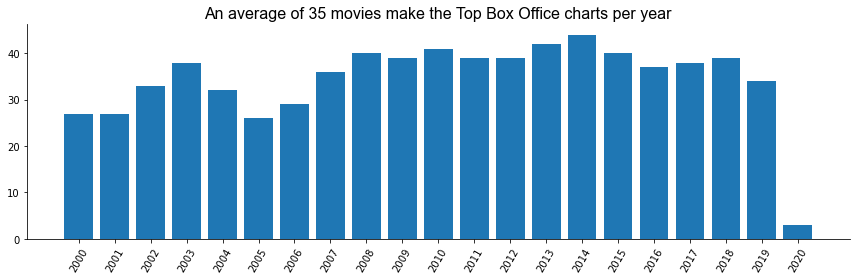

In [6]:
movies_year = df.groupby('year')['movie_title'].count().reindex(years)
movies_year_list = list(movies_year)

plt.figure(figsize=[12,4])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.bar(years,movies_year)   
plt.xticks(years,rotation=60)
plt.title('An average of 35 movies make the Top Box Office charts per year',family='arial',fontsize=16)
plt.tight_layout()

#plt.savefig("movies_per_year.svg")

plt.show;

In [7]:
budget_mean = df['budget'].mean()

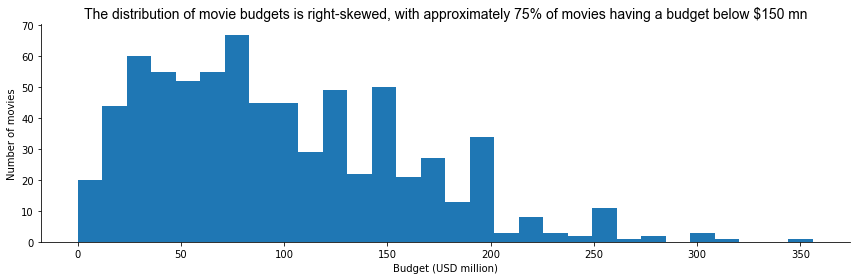

In [8]:
plt.figure(figsize=[12,4])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.hist(df['budget']/1000000,bins=30)
plt.title('The distribution of movie budgets is right-skewed, with approximately 75% of movies having a budget below $150 mn',family='arial',fontsize=14)
plt.tight_layout()
plt.xlabel('Budget (USD million)')
plt.ylabel('Number of movies')

plt.tight_layout()
plt.show;
#plt.savefig("movie_budget_distribution.svg")

In [9]:
# Import box office tickets and revenue data
df1= pd.read_csv('data/total_boxoffice_tickets.csv')

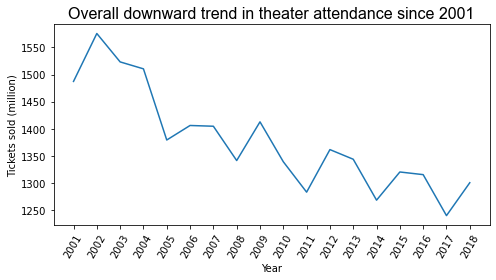

In [43]:
years = df1['year']#[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
plt.figure(figsize=[7,4])
plt.plot(df1['tickets_sold_mn'])
spacing = np.linspace(0,17,18)
plt.xticks(spacing,years,rotation=60)
plt.title('Overall downward trend in theater attendance since 2001',family='arial',fontsize=16)
plt.xlabel('Year')
plt.ylabel('Tickets sold (million)')

plt.tight_layout()
plt.savefig("movietickets.svg")
plt.show;

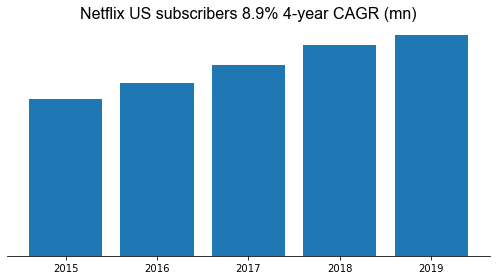

In [44]:
# Netflix
netflix_sub = [43.4,47.9,52.8,58.5,61]
netflix_years = [2015,2016,2017,2018,2019]

plt.figure(figsize=[7,4])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.yticks([])
plt.bar(netflix_years,netflix_sub)   
plt.xticks(netflix_years)
plt.title('Netflix US subscribers 8.9% 4-year CAGR (mn)',family='arial',fontsize=16)
plt.savefig("netflix.svg")
plt.tight_layout()

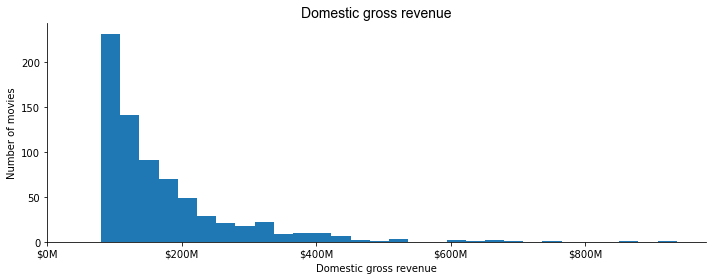

In [47]:
plt.figure(figsize=[10,4])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.hist(df['domestic_gross'],bins=30)
plt.title('Domestic gross revenue',family='arial',fontsize=14)
plt.xticks(np.linspace(0,800000000,5), ['$0M','$200M','$400M','$600M','$800M'])
plt.xlabel('Domestic gross revenue')
plt.ylabel('Number of movies')

plt.tight_layout()
plt.savefig("domesticrevenue.svg")
plt.show;